In [4]:
from fireTS.models import NARX, DirectAutoRegressor
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib notebook

# Load Data
The data is generated by the [type-1-diabetes simulator](https://github.com/jxx123/simglucose) I developed.

In [5]:
data = pd.read_csv(os.path.join('.', 'data', 'adolescent#001.csv'))
data = data.set_index('Time')
data.index = pd.to_datetime(data.index)

<IPython.core.display.Javascript object>


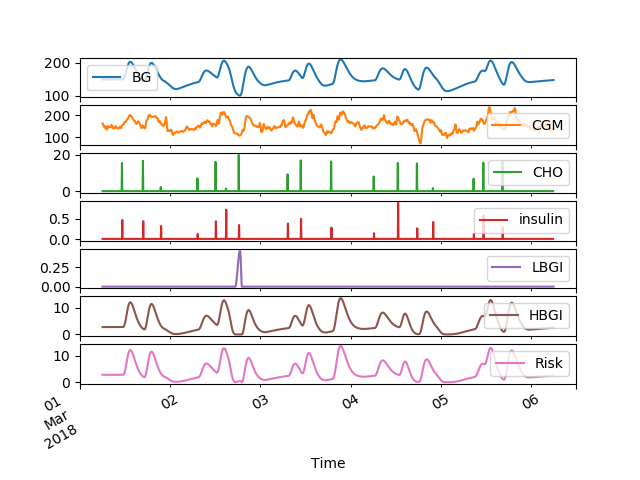

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f341285e080>,
      dtype=object)

In [6]:
data.plot(subplots=True)

Predict the blood glucose level measured by the Continuous Glucose Monitor (CGM) using insulin and meal as the exogenous inputs.

In [7]:
ytrain = data['CGM'].iloc[:1000]
Xtrain = data.loc[:, ['insulin', 'CGM']].iloc[:1000, :]

ytest = data['CGM'].iloc[1000:-1]
Xtest = data.loc[:, ['insulin', 'CGM']].iloc[1000:-1, :]

# Build the NARX model
Here linearRegression is used as base model. The time series model we are building becomes an Autoregression with Exogenous Inputs (ARX) model. The autoregression order is set to 6, the orders of the exogenous inputs are both set to 3 and the delays of the exogenous inputs are both set to 0.

In [8]:
narx_mdl = NARX(LinearRegression(), auto_order=6, exog_order=[3, 3], exog_delay=[0, 0])

In [9]:
narx_mdl.fit(Xtrain, ytrain)

In [10]:
ypred_narx = narx_mdl.predict(Xtest, ytest, step=6)
ypred_narx = pd.Series(ypred_narx, index=ytest.index)

<IPython.core.display.Javascript object>


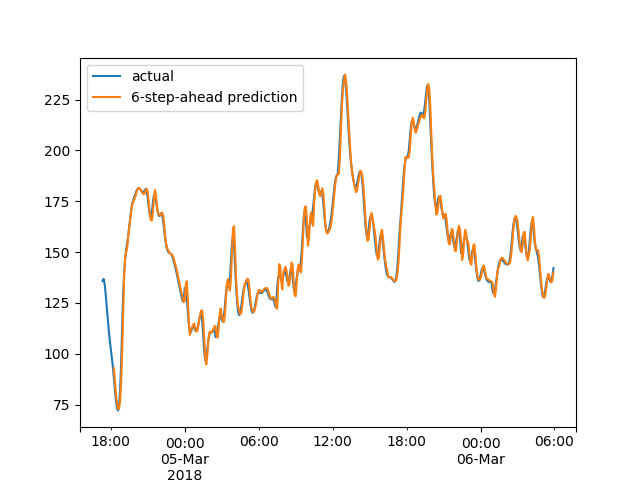

In [11]:
ytest.plot(label='actual')
ypred_narx.plot(label='6-step-ahead prediction')
plt.legend()

# Build the DirectAutoRegressor
The prediction step size must be specified in the constructor.

In [12]:
direct_mdl = DirectAutoRegressor(LinearRegression(), 
                                 auto_order=6, 
                                 exog_order=[3, 3], 
                                 exog_delay=[0, 0], 
                                 pred_step=6)

No prediction step can be set in the predict method.

In [13]:
direct_mdl.fit(Xtrain, ytrain)
ypred_direct = direct_mdl.predict(Xtest, ytest)
ypred_direct = pd.Series(ypred_direct, index=ytest.index)

<IPython.core.display.Javascript object>


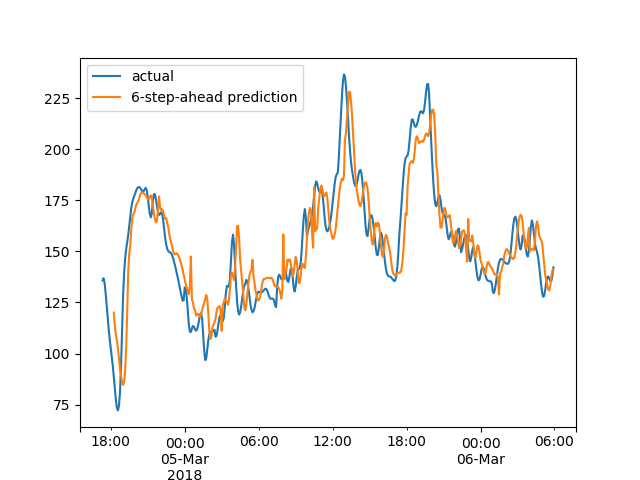

In [14]:
ytest.plot(label='actual')
ypred_direct.plot(label='6-step-ahead prediction')
plt.legend()